In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
df = pd.DataFrame(X)
df['Target'] = y
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  Target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [5]:
df['sex'] = pd.Categorical(df['sex'])
df['cp'] = pd.Categorical(df['cp'])
df['fbs'] = pd.Categorical(df['fbs'])
df['restecg'] = pd.Categorical(df['restecg'])
df['exang'] = pd.Categorical(df['exang'])
df['slope'] = pd.Categorical(df['slope'])
df['thal'] = pd.Categorical(df['thal'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    float64 
 12  thal      301 non-null    category
 13  Target    303 non-null    int64   
dtypes: category(7), float64(2), int64(5)
memory usage: 19.7 KB


In [9]:
df.describe(include= np.number).T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,299.0,0.672241,0.937438,0.0,0.0,0.0,1.0,3.0
Target,303.0,0.937294,1.228536,0.0,0.0,0.0,2.0,4.0


In [10]:
df.describe(include= 'category').T

,count,unique,top,freq
sex,303.0,2.0,1.0,206.0
cp,303.0,4.0,4.0,144.0
fbs,303.0,2.0,0.0,258.0
restecg,303.0,3.0,0.0,151.0
exang,303.0,2.0,0.0,204.0
slope,303.0,3.0,1.0,142.0
thal,301.0,3.0,3.0,166.0


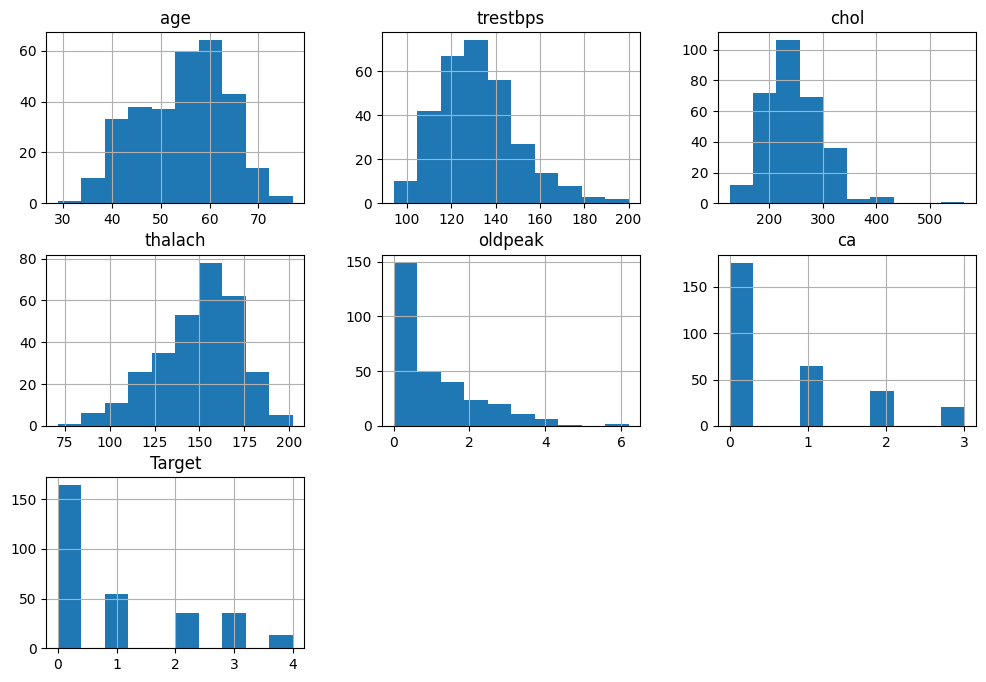

In [12]:
# Analisis univariado númerico
df.select_dtypes(include= np.number).hist(figsize=(12,8))
plt.show()

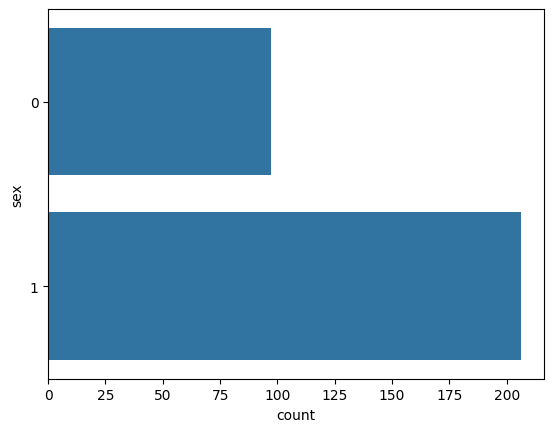

In [14]:
# Univariate Analysis Categorical
sns.countplot(data= df, y= "sex")
plt.show()

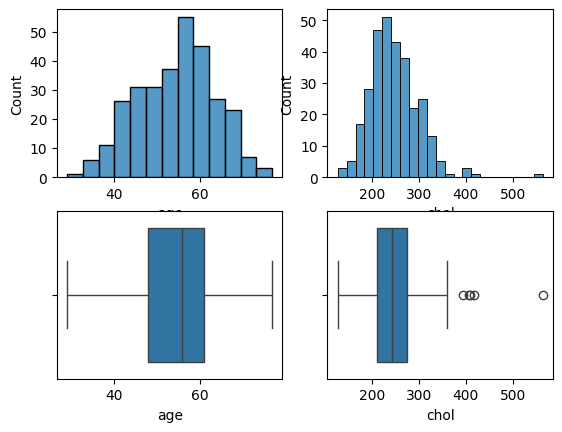

In [19]:
fig, axis = plt.subplots(2, 2)
sns.histplot(ax= axis[0, 0], data= df, x="age")
sns.boxplot(ax=axis[1, 0], data=df, x="age")
sns.histplot(ax= axis[0, 1], data= df, x="chol")
sns.boxplot(ax=axis[1, 1], data=df, x="chol")
plt.show()

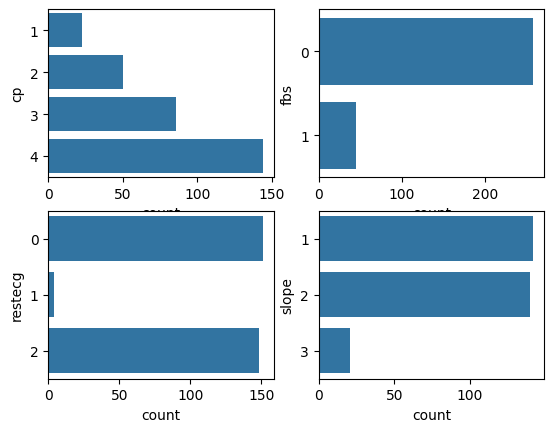

In [20]:
fig, axis = plt.subplots(2, 2)
sns.countplot(ax=axis[0, 0], data= df, y= "cp")
sns.countplot(ax=axis[0, 1], data= df, y="fbs")
sns.countplot(ax=axis[1, 0], data= df, y="restecg")
sns.countplot(ax=axis[1, 1], data= df, y="slope")
plt.show()